In [22]:
# installed pandas, numpy, yfinance, matplotlib
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import yfinance as yf


In [23]:
'''
# Sharpe Ratio - calculates pro compares a fund's historical or projected returns relative to an investment 
# benchmark with the historical or expected variability of such returns.

def sharpeRatio(assetReturn, riskFreeReturn, stdOfAssetAccessReturn):
  sharpeRatio = (assetReturn - riskFreeReturn) / stdOfAssetAccessReturn
  return sharpeRatio
'''


"\n# Sharpe Ratio - calculates pro compares a fund's historical or projected returns relative to an investment \n# benchmark with the historical or expected variability of such returns.\n\ndef sharpeRatio(assetReturn, riskFreeReturn, stdOfAssetAccessReturn):\n  sharpeRatio = (assetReturn - riskFreeReturn) / stdOfAssetAccessReturn\n  return sharpeRatio\n"

In [24]:
'''
# Efficient Frontier
# Return the securities with highest return at a given level of risk

"""
    Expected return,
    Variance/ Standard Deviation as a measure of the variability of returns, also known as risk and
    The covariance of one asset’s return to that of another asset.
"""

# The higher the STD, the greater the risk

# Pass in a list of stocks, and I will graph the efficient frontier. Also pass in your risk tolerance level, and it will return the highest return of rate.
# Risk level is a decimal, so .2 = 20% STD 
def efficientFrontier(stocks: pd.DataFrame, riskLevel=.2):
  plt.plot(stocks['variance'], stocks['expectedReturn'])
  plt.ylabel('Expected Return')
  plt.xlabel('Variance')
  plt.show()

# Ticker, stock return, std variability of returns
stocks = [('AAPL', 0.15, 0.10), ('TSLA', 0.25, 0.5)]
portfolio = pd.DataFrame(stocks, columns=['ticker', 'expectedReturn', 'variance'])

# df.pct_change()

efficientFrontier(portfolio)

# Could go a step further and have to calculate expectedReturn + variance given stock data
'''


'\n# Efficient Frontier\n# Return the securities with highest return at a given level of risk\n\n"""\n    Expected return,\n    Variance/ Standard Deviation as a measure of the variability of returns, also known as risk and\n    The covariance of one asset’s return to that of another asset.\n"""\n\n# The higher the STD, the greater the risk\n\n# Pass in a list of stocks, and I will graph the efficient frontier. Also pass in your risk tolerance level, and it will return the highest return of rate.\n# Risk level is a decimal, so .2 = 20% STD \ndef efficientFrontier(stocks: pd.DataFrame, riskLevel=.2):\n  plt.plot(stocks[\'variance\'], stocks[\'expectedReturn\'])\n  plt.ylabel(\'Expected Return\')\n  plt.xlabel(\'Variance\')\n  plt.show()\n\n# Ticker, stock return, std variability of returns\nstocks = [(\'AAPL\', 0.15, 0.10), (\'TSLA\', 0.25, 0.5)]\nportfolio = pd.DataFrame(stocks, columns=[\'ticker\', \'expectedReturn\', \'variance\'])\n\n# df.pct_change()\n\nefficientFrontier(portfolio)

In [25]:
# For each stock, calculate the STD using the last 30 days of data

import yfinance as yf

# nvda = yf.Ticker('NVDA')

# data = nvda.history(period='1mo')

# data['Close'].std()

In [26]:
'''
Creating portfolio: load the stock data

20% in MSFT
40% in AMZN
30% in AAPL
10% in NVDA

'''

msft = yf.Ticker('MSFT').history(period='5y')
amzn = yf.Ticker('AMZN').history(period='5y')
aapl = yf.Ticker('AAPL').history(period='5y')
nvda = yf.Ticker('NVDA').history(period='5y')

In [27]:
# Normed return - % return since portfolio begins
for stock_df in (msft, amzn, aapl, nvda): 
	stock_df['Normed Return'] = stock_df['Close'] / stock_df.iloc[0]['Close']

nvda.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Normed Return
Date,,,,,,,,
2023-04-17 00:00:00-04:00,265.649994,270.059998,264.329987,270.019989,32147100,0.0,0.0,4.871341
2023-04-18 00:00:00-04:00,275.329987,281.100006,273.570007,276.670013,60481200,0.0,0.0,4.991312
2023-04-19 00:00:00-04:00,273.609985,280.000000,272.320007,279.309998,35866000,0.0,0.0,5.038939
2023-04-20 00:00:00-04:00,276.709991,280.299988,270.000000,271.040009,42771300,0.0,0.0,4.889743
2023-04-21 00:00:00-04:00,269.519989,271.829987,267.220001,271.190002,34476600,0.0,0.0,4.892449


In [28]:
# track overall port. returns based on allocation % (amount) using normed returns
for stock_df, percentage in zip((msft, amzn, aapl, nvda), [.2, .4, .3, .1]):
  stock_df['Allocation'] = stock_df['Normed Return'] * percentage

nvda.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Normed Return,Allocation
Date,,,,,,,,,
2023-04-17 00:00:00-04:00,265.649994,270.059998,264.329987,270.019989,32147100,0.0,0.0,4.871341,0.487134
2023-04-18 00:00:00-04:00,275.329987,281.100006,273.570007,276.670013,60481200,0.0,0.0,4.991312,0.499131
2023-04-19 00:00:00-04:00,273.609985,280.000000,272.320007,279.309998,35866000,0.0,0.0,5.038939,0.503894
2023-04-20 00:00:00-04:00,276.709991,280.299988,270.000000,271.040009,42771300,0.0,0.0,4.889743,0.488974
2023-04-21 00:00:00-04:00,269.519989,271.829987,267.220001,271.190002,34476600,0.0,0.0,4.892449,0.489245


In [29]:
# hypothetical $1,000,000 portfolio overall
for stock_df in (msft, amzn, aapl, nvda):
  stock_df['Position Value'] = stock_df['Allocation']*1_000_000

nvda.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Normed Return,Allocation,Position Value
Date,,,,,,,,,,
2023-04-17 00:00:00-04:00,265.649994,270.059998,264.329987,270.019989,32147100,0.0,0.0,4.871341,0.487134,487134.124416
2023-04-18 00:00:00-04:00,275.329987,281.100006,273.570007,276.670013,60481200,0.0,0.0,4.991312,0.499131,499131.213343
2023-04-19 00:00:00-04:00,273.609985,280.000000,272.320007,279.309998,35866000,0.0,0.0,5.038939,0.503894,503893.921329
2023-04-20 00:00:00-04:00,276.709991,280.299988,270.000000,271.040009,42771300,0.0,0.0,4.889743,0.488974,488974.307889
2023-04-21 00:00:00-04:00,269.519989,271.829987,267.220001,271.190002,34476600,0.0,0.0,4.892449,0.489245,489244.906913


In [30]:
# Develop our portfolio

# Gather all positions and respective values
all_positions = [msft['Position Value'], amzn['Position Value'], aapl['Position Value'], nvda['Position Value']]

# Dataframe creation from values 
portfolio_val = pd.concat(all_positions, axis=1)

# Label columns
portfolio_val.columns = ['MSFT', 'AMZN', 'AAPL', 'NVDA']

# each list is own column indicated by axis = 1
portfolio_val['Total'] = portfolio_val.sum(axis=1)

portfolio_val.tail()

,MSFT,AMZN,AAPL,NVDA,Total
Date,,,,,
2023-04-17 00:00:00-04:00,641856.918489,541499.220855,1.258681e+06,487134.124416,2.929171e+06
2023-04-18 00:00:00-04:00,640901.261337,539180.193672,1.268127e+06,499131.213343,2.947340e+06
2023-04-19 00:00:00-04:00,641079.099027,549721.350614,1.276964e+06,503893.921329,2.971658e+06
2023-04-20 00:00:00-04:00,635878.397884,547138.738211,1.269498e+06,488974.307889,2.941490e+06
2023-04-21 00:00:00-04:00,635100.578422,563741.068437,1.257081e+06,489244.906913,2.945168e+06


In [31]:
# Daily returns

portfolio_val['Daily Return'] = portfolio_val['Total'].pct_change(1).dropna()

In [32]:
# Calculate Sharpe w/ R_F_R of return = 5%
sharpe = (portfolio_val["Daily Return"].mean() - 0.5) / portfolio_val["Daily Return"].std()
sharpe

# Annualize the ratio w/ 252 trading days each year
# using Weiner process (stock price governance), sqrt
# note: variance is proportional to time
annualized_sharpe = (252**0.5) * sharpe
annualized_sharpe

-403.78383813472624

In [33]:
# Portfolio Optimization (key)
# pick stock with best return for given risk level (variance)

msft = yf.Ticker("MSFT").history(period='4mo')
amzn = yf.Ticker("AMZN").history(period='4mo')
meta = yf.Ticker("META").history(period='4mo')
tsla = yf.Ticker("TSLA").history(period='4mo')
meta.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-04-17 00:00:00-04:00,219.789993,220.979996,217.130005,218.860001,15481900,0.0,0.0
2023-04-18 00:00:00-04:00,219.910004,220.440002,216.210007,217.889999,12281000,0.0,0.0
2023-04-19 00:00:00-04:00,213.470001,217.330002,212.929993,215.699997,15898100,0.0,0.0
2023-04-20 00:00:00-04:00,213.479996,216.750000,212.770004,213.070007,16475400,0.0,0.0
2023-04-21 00:00:00-04:00,210.210007,213.410004,209.580002,212.889999,17702400,0.0,0.0


In [34]:
# add (concatenate) + rename

stocks = pd.concat([msft["Close"], amzn["Close"], meta["Close"], tsla["Close"]], axis = 1)
stocks.columns = ["msft", "amzn", "meta", "tsla"]
stocks.tail()

,msft,amzn,meta,tsla
Date,,,,
2023-04-17 00:00:00-04:00,288.799988,102.739998,218.860001,187.039993
2023-04-18 00:00:00-04:00,288.369995,102.300003,217.889999,184.309998
2023-04-19 00:00:00-04:00,288.450012,104.300003,215.699997,180.589996
2023-04-20 00:00:00-04:00,286.109985,103.809998,213.070007,162.990005
2023-04-21 00:00:00-04:00,285.760010,106.959999,212.889999,165.080002


In [37]:
# use the Monte Carlo method to simulate various portfolios (several thousand) using different weights for each stock
# rate based on volatility/sharpe/returns

daily_return = np.log(stocks/stocks.shift(1))

# record each value for each portfolio (return, sharpe, volatility - variance, weights)
number_ports = 4000
a_weights = np.zeros((number_ports, len(stocks.columns)))
returns= np.zeros(number_ports)
volatility = np.zeros(number_ports)
sharpe_arr = np.zeros(number_ports)

for ind in range(number_ports): 
    # weights 
    _weights = np.array(np.random.random(4)) 
    _weights = _weights/np.sum(_weights)  
	
    # record weights
    a_weights[ind,:] = _weights
	
    # anticipated return 
    returns[ind] = np.sum((daily_return.mean()*_weights)*252)
    print(daily_return.mean(), type(_weights))

    # anticipated volatility 
    volatility[ind] = np.sqrt(np.dot(_weights.T,np.dot(daily_return.cov()*252, _weights)))

    # anticipated Sharpe 
    sharpe_arr[ind] = returns[ind] / volatility[ind]

msft    0.002279
amzn    0.003014
meta    0.007377
tsla    0.003399
dtype: float64 <class 'numpy.ndarray'>
msft    0.002279
amzn    0.003014
meta    0.007377
tsla    0.003399
dtype: float64 <class 'numpy.ndarray'>
msft    0.002279
amzn    0.003014
meta    0.007377
tsla    0.003399
dtype: float64 <class 'numpy.ndarray'>
msft    0.002279
amzn    0.003014
meta    0.007377
tsla    0.003399
dtype: float64 <class 'numpy.ndarray'>
msft    0.002279
amzn    0.003014
meta    0.007377
tsla    0.003399
dtype: float64 <class 'numpy.ndarray'>
msft    0.002279
amzn    0.003014
meta    0.007377
tsla    0.003399
dtype: float64 <class 'numpy.ndarray'>
msft    0.002279
amzn    0.003014
meta    0.007377
tsla    0.003399
dtype: float64 <class 'numpy.ndarray'>
msft    0.002279
amzn    0.003014
meta    0.007377
tsla    0.003399
dtype: float64 <class 'numpy.ndarray'>
msft    0.002279
amzn    0.003014
meta    0.007377
tsla    0.003399
dtype: float64 <class 'numpy.ndarray'>
msft    0.002279
amzn    0.003014
met

In [38]:
# find the portfolio w/ greatest sharpe ratio
max_port = sharpe_arr.argmax()
a_weights[max_port, :]

array([0.08825323, 0.01929323, 0.853761  , 0.03869255])

Text(0, 0.5, 'Return')

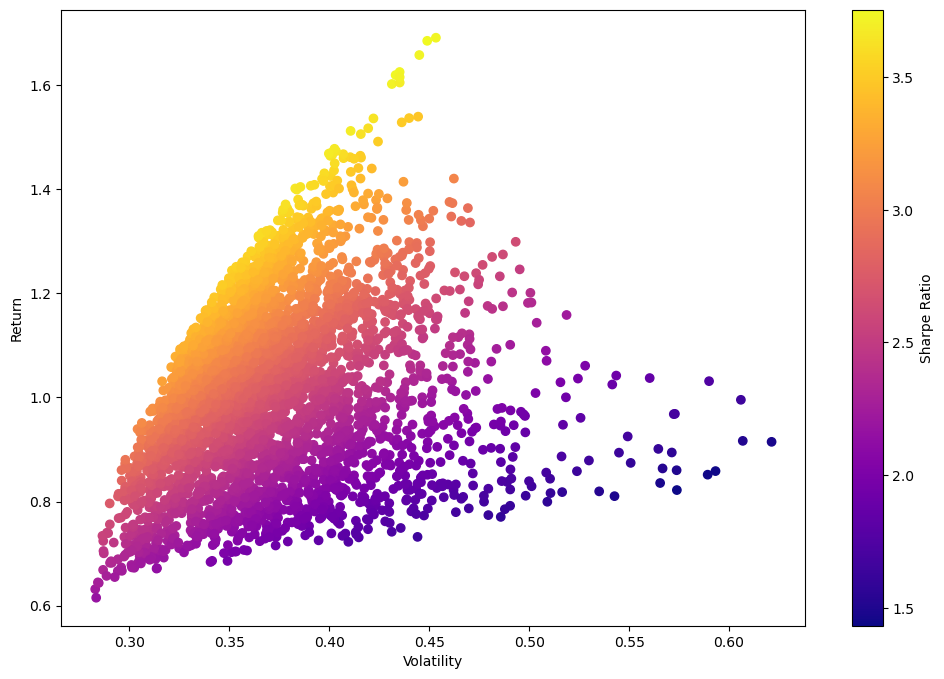

In [39]:
# visualize
plt.figure(figsize=(12,8))
plt.scatter(volatility,returns,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

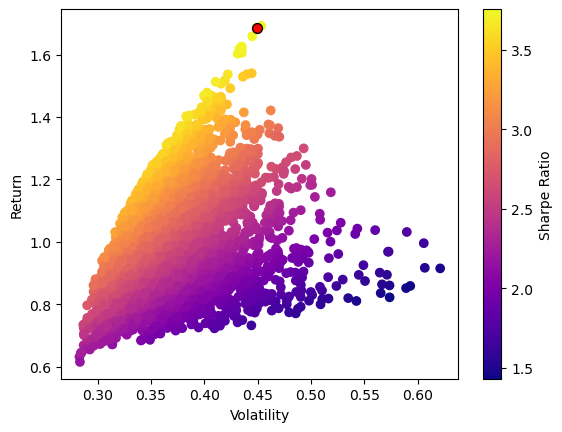

In [40]:
# highest ROR and lowest vola. w/ Sharpe 
max_sharpe_return = returns[max_port]
max_sharpe_vola = volatility[max_port]

# plot.
plt.scatter(volatility,returns,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# plot efficient frontier
plt.scatter(max_sharpe_vola, max_sharpe_return, c='red', s=50, edgecolors='black')

In [ ]:
#  portfolio_val.drop('Total', axis=1).plot(figsize=(10,8))

In [ ]:
# Daily Return
#  portfolio_val['Daily Return'] = portfolio_val['Total'].pct_change(1)

In [ ]:
# average daily return
# portfolio_val['Daily Return'].mean()

In [ ]:
# standard deviation
#  portfolio_val['Daily Return'].std()

In [ ]:
# portfolio_val['Daily Return'].plot(kind='hist', bins=50, figsize=(4,5))

In [ ]:
# cum_return = 100 * (portfolio_val['Total'][-1]/portfolio_val['Total'][0] - 1)